# Import Packages
Below, you'll find what you need in order to run this notebook successfully. I used Pandas and Matplotlib.

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Read Data In
I pulled in baby name data from 2010 and 2019; the show premiered in April 2011, so I chose the year before as a comparison to demonstrate that some of the names might not have ever been
on anyone's radar, save people that had read the books. I chose 2019 because the series ended in May of that year, so by then, the names would have become a part of pop culture.

In [99]:
#2010 data
df_2010 = pd.read_csv('assets/yob_2010.csv')
#2019 data
df_2019 = pd.read_csv('assets/yob2019.csv')


# Combine the Two Dataframes and Clean Up
I combined the 2010 and 2019 data into one frame so I could clean up and analyze it more easily.

In [104]:

#I combined the two dataframes into one and merged the "Name" column because there were, for example, more than one instance of the name "Arya" in that column in both files.
df_combined_years = pd.merge(df_2010, df_2019, on=['Name', 'Gender'], how='outer')

#change NaN values to zeroes
df_combined_years['2010 Name Count'].fillna(0, inplace = True)
df_combined_years['2019 Name Count'].fillna(0, inplace = True)
df_combined_years

,Name,Gender,2010 Name Count,2019 Name Count
0,Isabella,F,22925.0,13360.0
1,Sophia,F,20648.0,13769.0
2,Emma,F,17354.0,17176.0
3,Olivia,F,17030.0,0.0
4,Ava,F,15436.0,14515.0
...,...,...,...,...
42858,Zyhaire,M,0.0,5.0
42859,Zyheem,M,0.0,5.0
42860,Zykel,M,0.0,5.0
42861,Zyking,M,0.0,5.0


In [101]:
#Testing to see if I can pull names and get counts side by side
df_combined_years.loc[(df_combined_years['Name']=='Cersei') | (df_combined_years['Name']=='Sansa')]

,Name,Gender,2010 Name Count,2019 Name Count
34254,Sansa,F,0.0,28.0
36823,Cersei,F,0.0,6.0


# Analyze the Data
First, I used the .loc method to retrieve rows from the dataframe that contained specific _Game of Thrones_ character names, then I sorted values so male and female results would show up side by side. 

In [102]:
#See how many times specific character names show up in the dataframe to compare occurences in year 2010 vs. 2019 (HOW TO SHOW RESULTS EVEN IF ZERO)
df_characters = df_combined_years.loc[
                        (df_combined_years['Name']=='Cersei') |  
                        (df_combined_years['Name']=='Arya') | 
                        (df_combined_years['Name']=='Jon') | 
                        (df_combined_years['Name']=='Khaleesi') |
                        (df_combined_years['Name']=='Bran') |
                        (df_combined_years['Name']=='Brienne') |
                        (df_combined_years['Name']=='Daenerys') |
                        (df_combined_years['Name']=='Jaime') |
                        (df_combined_years['Name']=='Jorah') |
                        (df_combined_years['Name']=='Margaery') |
                        (df_combined_years['Name']=='Samwell') |
                        (df_combined_years['Name']=='Sansa') |
                        (df_combined_years['Name']=='Theon') |
                        (df_combined_years['Name']=='Tyrion')
                         ]
#Sort by Name so that male and female values show up paired together.
df_characters.sort_values('Name')


,Name,Gender,2010 Name Count,2019 Name Count
941,Arya,F,273.0,3047.0
21548,Arya,M,88.0,49.0
32301,Bran,M,5.0,8.0
6419,Brienne,F,20.0,33.0
36823,Cersei,F,0.0,6.0
34102,Daenerys,F,0.0,142.0
41916,Daenerys,M,0.0,5.0
20185,Jaime,M,814.0,518.0
2263,Jaime,F,85.0,48.0
20398,Jon,M,439.0,315.0


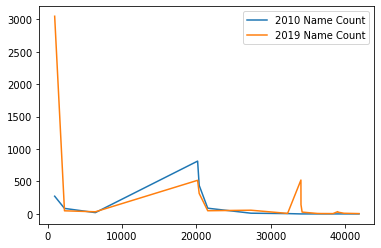

In [103]:
df_characters[['2010 Name Count', '2019 Name Count']].plot()
plt.show()

<AxesSubplot:title={'center':'TESTING'}, xlabel='Character Name', ylabel='Number of Occurences'>

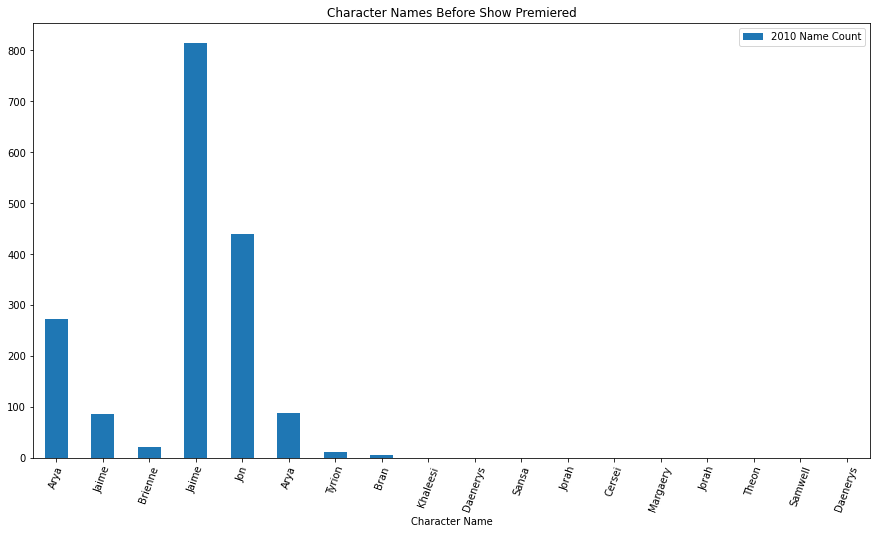

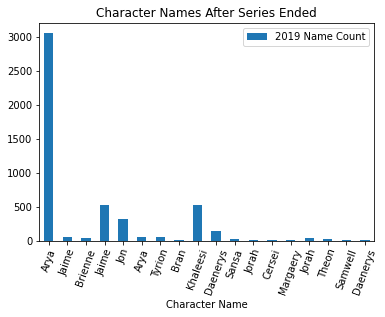

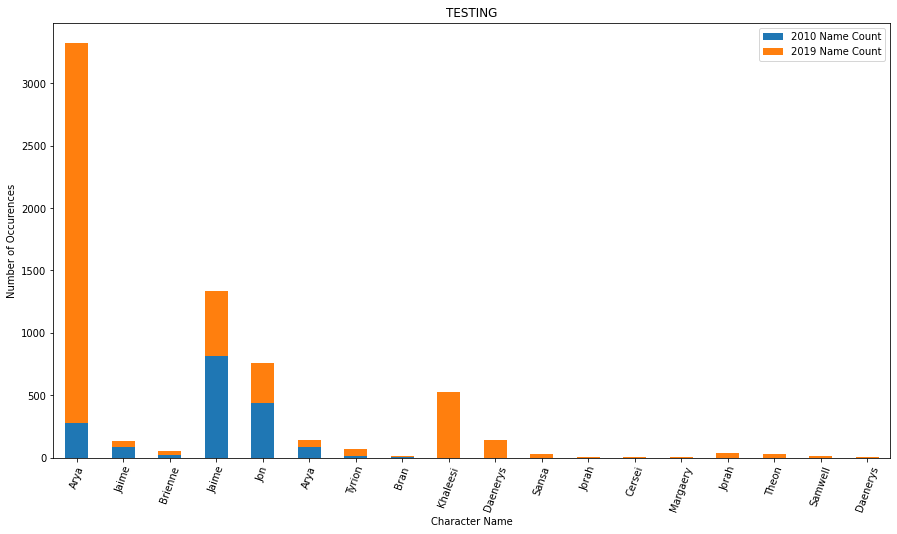

In [125]:
df_characters.plot.bar(x='Name', y='2010 Name Count', rot=70, title='Character Names Before Show Premiered', xlabel='Character Name', figsize=(15, 8))
df_characters.plot.bar(x='Name', y='2019 Name Count', rot=70, title='Character Names After Series Ended', xlabel='Character Name')
df_characters.plot.bar(x=('Name'), y=['2010 Name Count', '2019 Name Count'], rot=70, title="TESTING", figsize=(15, 8), stacked=True, xlabel='Character Name', ylabel='Number of Occurences')
  
#plot male and female separately?"

# Conclusion
Copy goes here